# Deep Learning Lab @ Telecom SudParis 2020 
  ### Mohamed Ibn Khedher & Mounim A. El-Yacoubi

# Introduction to the Deep Learning Lab
Classification of Handwritten Digits by a Convolutional Neural Network (CNN)
This study is carried out on MNIST, a dataset of handwritten numerals made of up of 60000 for training and 10000 for test. Each image has a size of 28x28 pixels, the gray level of each being between 0 and 255.

# Installation

**To install keras:**
 * pip install keras==2.2.4

**To install tensorflow:**
 * pip install tensorflow==1.13.1 
 
**NB:** To avoid or if you have trouble with intsalling these libraries on your PC, you can use **google colab** where a python instance is already installed with all the needed libraries.

# Demo:

This Lab contains 6 parts. The goal is to compelete the TO DO parts.

1. Data reading and splitting.
2. Data visualisation.
3. Define the model architecture
4. Model fiting
5. Model evaluation
6. New model architecture & evaluation

**NB:** In the Model evaluation part, Modify hyper parameters like **batch_size**, **epochs**, **validation_split**, etc., used so as to improve the results. Make
an analysis and interpretation in light of the new results

## Import the needed packages

In [31]:
#### First, you should import libraires.
#### 

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
### for the color
import termcolor
todo=termcolor.colored('TO DO', color='red')

# I) Data reading and splitting

This part consists of reading the MNIST dataset, splitting it into train and test sets and displaying a number of images for each set.

In [32]:
# I - Data reading & splitting

from keras.datasets import mnist

# 1) load data from MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Input image format
rows, cols, channels = 28,28,1

# 2) What does "x_train", "y_train", "x_test" and "y_test" present ?

# X_train and y_train, refers to the training data, y_train is the label
# x_test and y_test refers to the test data, y_test is the label

# 3) Reshape "x_train" and "x_test" according to the input image format

x_train = x_train.reshape(60000,rows,cols,channels)
x_test = x_test.reshape(10000,rows,cols,channels)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#4)Display the number of images in train and test sets

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



60000 train samples
10000 test samples


# II) Data visualisation 

Which library is required to visualise images?  
Complete the following commands to display the first 200 images from the training set.

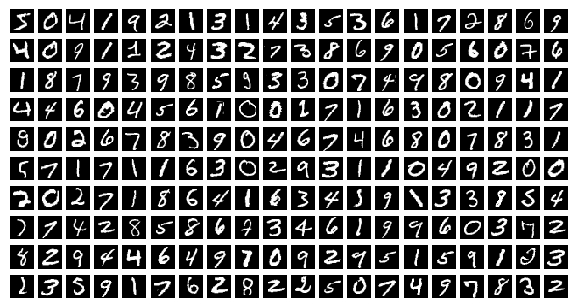

In [33]:
# II - Data visualisation

#1) Which library is required to  display images
import matplotlib.pyplot as plt

#2) Complete the script to display the first 200 images from the MNIST dataset

plt.figure(figsize=(7.195, 3.841), dpi=100)

for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(x_train[i].reshape([28,28]), cmap='gray')
    plt.axis('off')


# III) Model architetcure

In [34]:
#III - Model Architecture 
  
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#1) In a separate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

# IV) Fiting

In [35]:
# IV - Fiting
    
# 1) convert labels to categorical type

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 2) complete the following command to fit the Deep neural model.
# 3) select the hyperparameters values

model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_split=0.20)

# 4) What does each hyperparameter presents
# batch_size defines the number of samples of training dataset to perform steps
# such as gradient descent on before updating the inner parameters of the model

#epochs > number of epochs is the number of times the learning algorithm will
#work through the entire training dataset

#Validation split > This is the portion of the training data set that is used
#for validation in the training process.


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2716 - accuracy: 0.9162 - val_loss: 0.0612 - val_accuracy: 0.9827
Epoch 2/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0891 - accuracy: 0.9734 - val_loss: 0.0481 - val_accuracy: 0.9853
Epoch 3/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0677 - accuracy: 0.9796 - val_loss: 0.0452 - val_accuracy: 0.9872
Epoch 4/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0565 - accuracy: 0.9835 - val_loss: 0.0399 - val_accuracy: 0.9885
Epoch 5/10
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0392 - val_accuracy: 0.9893
Epoch 6/10
48000/48000 [==============================] - 48s 1ms/step - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0365 - val_accuracy: 0.9897
Epoch 7/10
48000/48000 [==============================] - 53s 1ms/st

# Model evaluation

In [36]:
# V - Evaluate the model

# 1) complete the command to evaluate the model 

score = model.evaluate(x_test, y_test, verbose=0)

# 2) complete the command to display model performance

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.02923383915708655
Test accuracy: 0.9909999966621399


**NB:** Modify hyper parameters like **batch_size**, **epochs**, **validation_split**, etc., used so as to improve the results. Make
an analysis and interpretation in light of the new results

#### To analyze the results, plot the confusion matrix using the following command

In [37]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
y_predict = model.predict_classes(x_test)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[ 974    0    2    1    0    0    1    0    1    1]
 [   0 1133    1    0    0    0    0    0    1    0]
 [   1    1 1026    0    1    0    0    3    0    0]
 [   0    0    3 1005    0    1    0    0    1    0]
 [   0    0    0    0  975    0    1    0    1    5]
 [   1    1    0   12    0  875    2    0    0    1]
 [   4    2    0    0    1    4  945    0    2    0]
 [   0    1    6    2    0    0    0 1015    1    3]
 [   1    0    2    1    0    0    0    1  967    2]
 [   0    1    0    2    2    3    1    1    4  995]]


# VI) New Model Architetcure & Evaluation

Now, It is time to create a new model and evaluate its performance on the MNIST dataset. We suggest to implement the following architecure.

## Create model

In [38]:
# VI - Create a new model and evaluate its performance
def New_model():
    # 1) create model
    model = Sequential()
    model.add(Conv2D(30, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(Dropout(0.20))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    # Compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(), 
                  metrics=['accuracy'])
    model.summary()
    return model
New_model();  

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 10, 15)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               192128    
_________________________________________________________________
dense_19 (Dense)             (None, 50)               

In [39]:

# 2) Model evaluation
# build the model
model = New_model()
# Fit the model
model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=100)
# Final evaluation of the model


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 10, 15)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               192128    
_________________________________________________________________
dense_22 (Dense)             (None, 50)               

In [40]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("New Model Error: %.2f%%" % (100-scores[1]*100))
print('Test loss:',scores[0] )
print('Test accuracy:', scores[1] )

New Model Error: 0.79%
Test loss: 0.029483977849333223
Test accuracy: 0.9921000003814697


In [41]:
#### To analyze the results, plot the confusion matrix using the following command

In [42]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
y_predict = model.predict_classes(x_test)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[ 975    1    0    0    1    0    2    1    0    0]
 [   0 1132    2    0    0    1    0    0    0    0]
 [   2    0 1027    1    0    0    0    2    0    0]
 [   0    0    2 1005    0    1    0    1    1    0]
 [   0    0    0    0  975    0    1    0    0    6]
 [   2    0    0    6    0  882    2    0    0    0]
 [   3    2    0    0    1    3  949    0    0    0]
 [   0    2    2    2    0    0    0 1020    1    1]
 [   4    0    4    0    0    0    1    2  959    4]
 [   0    0    0    2    6    2    0    2    0  997]]
